In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('default')
plt.style.use('thesis_style.mplstyle') # only activate for thesis, adjust height

In [3]:
p_cancer = np.load('p_cancer_full.npy')

In [4]:
parameters = np.load('p_cancer_fulltrial_parameters.npz')
gammas = parameters['gammas']
Ks = parameters['Ks']
Ncrit = parameters['Ncrit']
dens0 = parameters['dens0']
T_p = parameters['T_p']
r_b = parameters['r_b']
s_p = parameters['s_p']
T_d = parameters['T_d']
s_d = parameters['s_d']
r_d = parameters['r_d']

In [5]:
Kcrit = (T_p * r_b**2 * s_p) / (T_d * s_d**2 * (r_b - r_d))

In [6]:
Ncrit = (T_p * r_b * s_p) / (T_d * s_d**2)

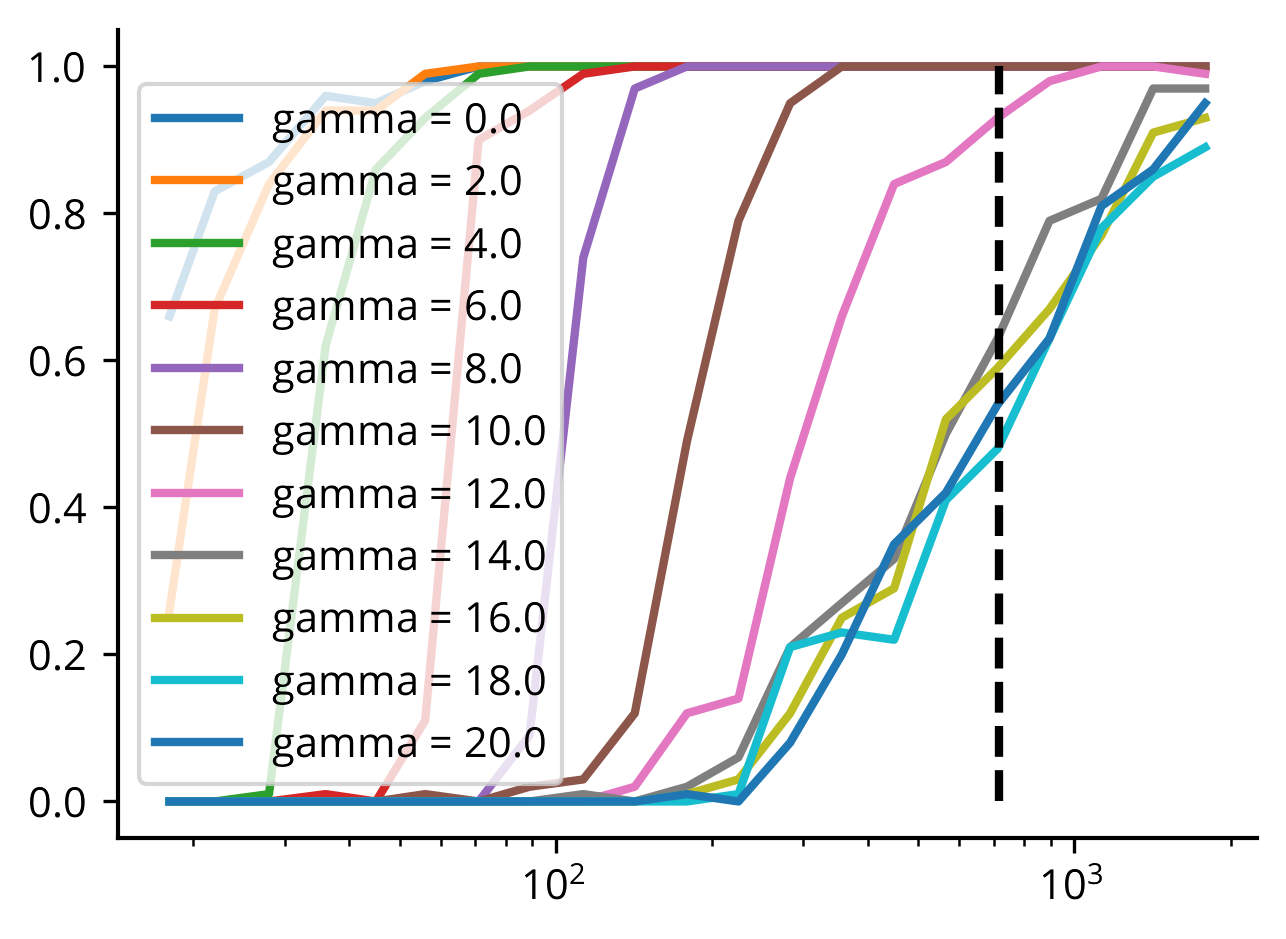

In [7]:
# plt.plot(gammas, p_cancer.mean(-1))
for i, gamma in enumerate(gammas):
    plt.plot(Ks, p_cancer[i].mean(-1), label='gamma = {}'.format(gamma)) if i % 2 == 0 else None
    
plt.legend()
plt.vlines(Kcrit, 0, 1, color='k', ls='--')
plt.xscale('log')

In [8]:
dens0

array(0.25)

In [9]:
p_cancer.shape

(21, 21, 100)

In [10]:
p_d = 1e-8 * T_d
p_p = 1e-8 * T_p
r_b, r_d, Ks, p_d, s_d, s_p, p_p

(array(0.5),
 array(0.375),
 array([  18.,   22.,   28.,   36.,   45.,   56.,   71.,   89.,  113.,
         142.,  179.,  225.,  283.,  356.,  449.,  565.,  711.,  895.,
        1127., 1418., 1786.]),
 7e-06,
 array(0.1),
 array(0.0005),
 0.05)

In [11]:
(r_b - r_d) / (r_d * p_p * s_p)

13333.333333333332

In [12]:
import sympy as sp
t = sp.symbols('t', real=True, positive=True)

In [13]:
t_rescue = np.zeros((len(gammas), len(Ks)), dtype=np.complex_)
t_stochastic_death = np.zeros((len(gammas), len(Ks)))
a = r_b + r_d * (-p_p * s_p + p_d + s_d) * t
for i, gamma in enumerate(gammas):
    for j, K in enumerate(Ks):
        D = 1 / (2 + np.exp(gamma))
        condition = K * (a - r_d) / (a**2) * (1 + 2 * sp.sqrt((a - r_d) * D) * t) - p_p * s_p / p_d / s_d**2
        try:
            t_rescue[i, j] = sp.nsolve(condition, t, 0)
        except:
            t_rescue[i, j] = np.nan
            
            
        t_stochastic_death[i, j] = 1 / r_d**(dens0 * K)

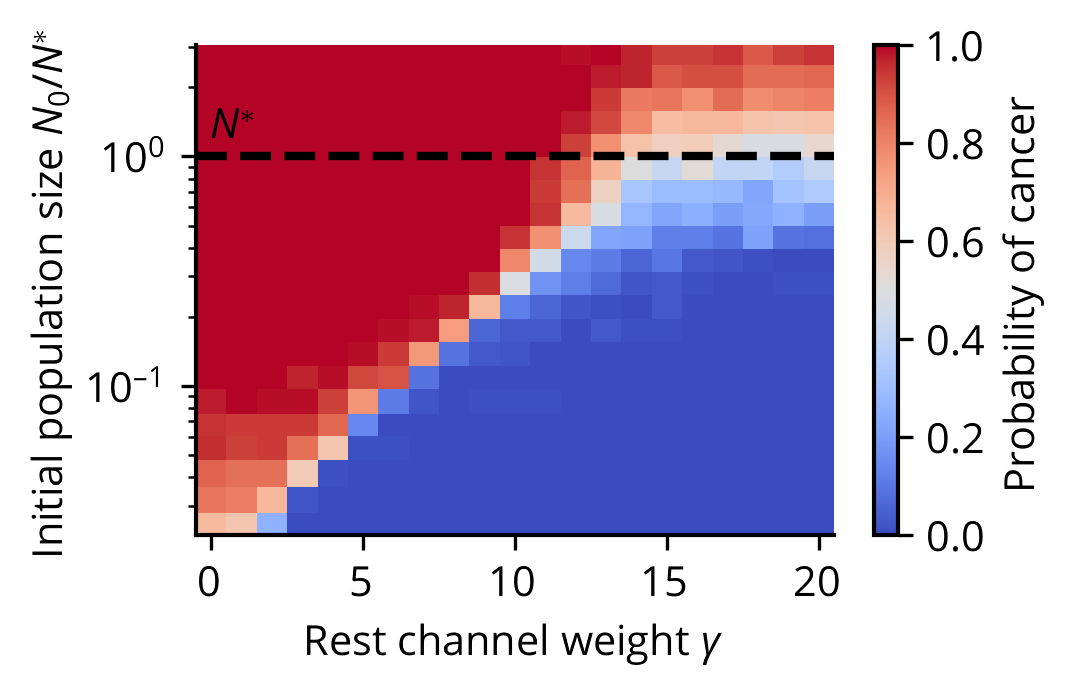

In [21]:
golden_ratio = (np.sqrt(5) + 1.0) / 2.0
# get default figsize
wi, le = plt.rcParams['figure.figsize']
wi *= .7
le = wi / golden_ratio
plt.figure(figsize=(wi, le))
dgamma = (gammas[1] - gammas[0])/2
dK = (Ks[1] - Ks[0])/2
X, Y = np.meshgrid(gammas, Ks, indexing='ij')
X_edges, Y_edges = np.meshgrid(
    np.concatenate([gammas, [gammas[-1] + (gammas[1] - gammas[0])]]),  # Add an extra edge for X
    np.concatenate([Ks, [Ks[-1] * (Ks[1] / Ks[0])]])  # Add an extra edge for Y (log scale)
)
X_edges -= dgamma
Y_edges -= dK
cp = plt.pcolormesh(X_edges, Y_edges * dens0 / Ncrit, p_cancer.mean(-1).T, cmap='coolwarm', shading='auto', vmin=0, vmax=1)
# plt.contour(X, Y* dens0 / Ncrit, (t_rescue.real-np.minimum(13333, t_stochastic_death)), cmap='Greys', shading='auto', levels=[-2, -1, 1, 2], origin='lower')

# plt.contour(X, Y, dv.T, levels=[0], colors='k', origin='lower')
# plt.contour(X, Y, dT.T, levels=[-1e5, 0, 1e4], colors='k', origin='lower')
# plt.contourf(X, Y, p_cancer.mean(-1), levels=[0, .4, .6, 1], cmap='coolwarm', origin='lower')
# plt.contour(X, Y, p_cancer.mean(-1), levels=[.4, .5, .6], cmap='coolwarm', origin='lower')
# plt.imshow(p_cancer.mean(-1).T, aspect='auto', extent=[gammas[0]-dgamma, gammas[-1]+dgamma, Ks[0]-dK, Ks[-1]+dK], cmap='coolwarm', origin='lower')
plt.colorbar(cp, label='Probability of cancer')
# plt.hlines(Kcrit, gammas[0]-dgamma, gammas[-1]+dgamma, color='k', ls='--')
plt.hlines(1, gammas[0]-dgamma, gammas[-1]+dgamma, color='k', ls='--')

# plt.plot(gammas, 1 / (2 * np.sqrt((r_b-r_d)/(2 + np.exp(gammas)))), 'k--')
plt.ylabel('Initial population size $N_0/N^*$')
plt.yscale('log')
plt.xlabel('Rest channel weight $\gamma$')
plt.text(0, 1.1, '$N^*$', ha='left', va='bottom')
# add colorbar
plt.savefig('p_cancer_fulltrial.pdf', bbox_inches='tight')

C:\Users\Simon Syga\AppData\Local\Temp\ipykernel_21084\2945748579.py:1: UserWarning: The following kwargs were not used by contour: 'shading'
  plt.contour(X, Y* dens0 / Ncrit, (t_rescue.real-13333), cmap='Greys', shading='auto', levels=[-2, -1, 1, 2], origin='lower')


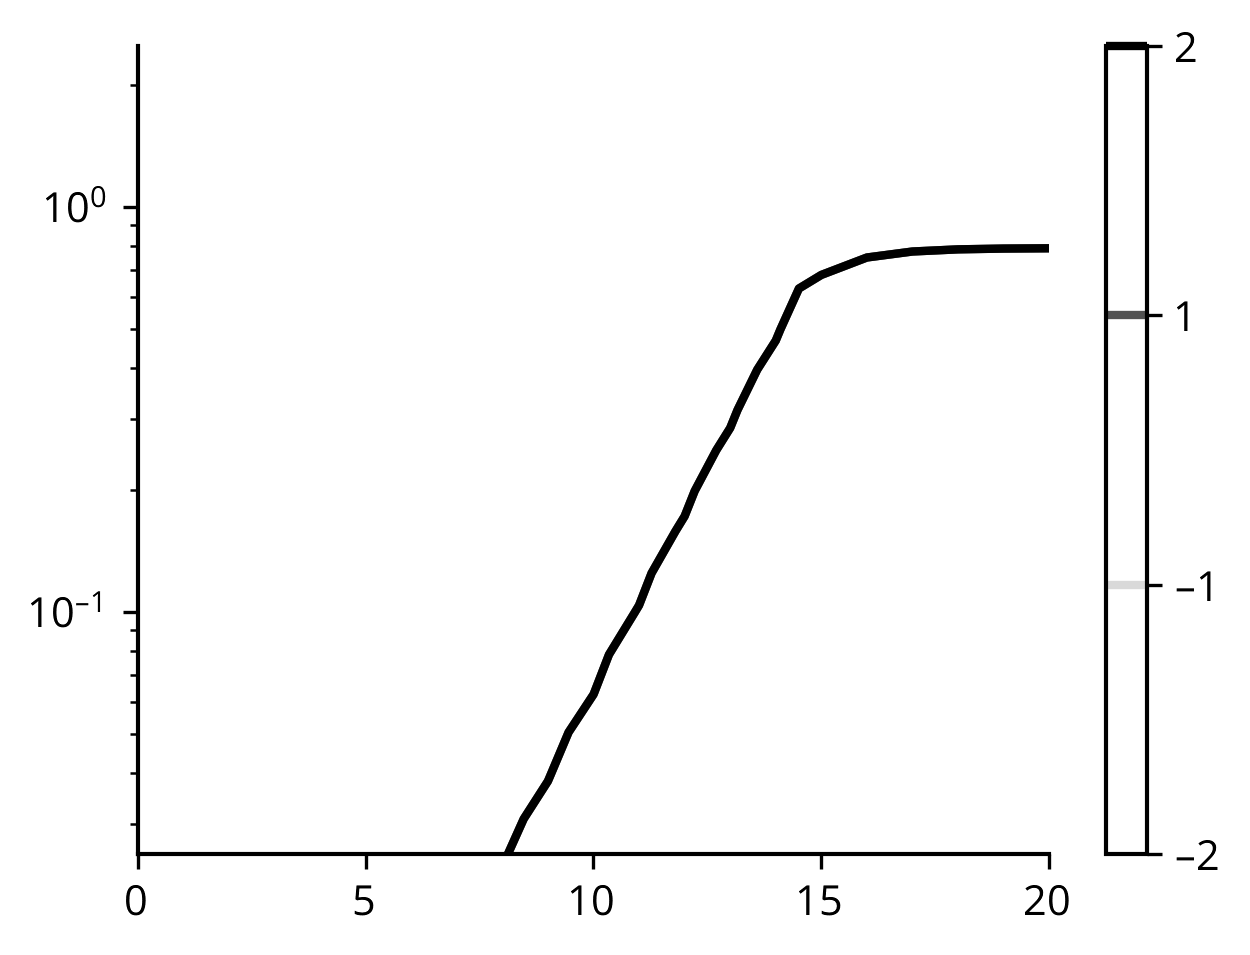

In [15]:
plt.contour(X, Y* dens0 / Ncrit, (t_rescue.real-13333), cmap='Greys', shading='auto', levels=[-2, -1, 1, 2], origin='lower')
plt.colorbar()
plt.yscale('log')
